# Algorithm Analysis

When two programs solve the same problem but look different, is one program better than the other?

Consider the following code snippet that computes the sum of the first n integers. The algorithm uses the idea of an accumulator variable that is initialized to 0. The solution then iterates through the n integers, adding each to the accumulator.

In [3]:
def sumOfN(n):
    theSum = 0
    for i in range(1,n+1):
        theSum = theSum + i

    return theSum

print(sumOfN(10))

55


Algorithm analysis is concerned with comparing algorithms based upon the amount of computing resources that each algorithm uses. We want to be able to consider two algorithms and say that one is better than the other because it is more efficient in its use of those resources or perhaps because it simply uses fewer. 

At this point, it is important to think more about what we really mean by computing resources. There are two different ways to look at this. One way is to consider the **amount of space or memory** an algorithm requires to solve the problem. The amount of space required by a problem solution is typically dictated by the problem instance itself. Every so often, however, there are algorithms that have very specific space requirements, and in those cases we will be very careful to explain the variations.

As an alternative to space requirements, we can analyze and compare algorithms based on the **amount of time they require to execute**. This measure is sometimes referred to as the “execution time” or “running time” of the algorithm. One way we can measure the execution time for the function `sumOfN` is to do a benchmark analysis. This means that we will track the actual time required for the program to compute its result. In Python, we can benchmark a function by noting the starting time and ending time with respect to the system we are using. In the `time` module there is a function called `time` that will return the current system clock time in seconds since some arbitrary starting point. By calling this function twice, at the beginning and at the end, and then computing the difference, we can get an exact number of seconds (fractions in most cases) needed for execution.

In [1]:
import time

def sumOfN2(n):
    start = time.time()

    theSum = 0
    for i in range(1,n+1):
        theSum = theSum + i

    end = time.time()

    return theSum,end-start

`sumOfN2` shows the original `sumOfN` function with the timing calls embedded before and after the summation. The function returns a tuple consisting of the result and the amount of time (in seconds) required for the calculation. If we perform 5 invocations of the function, each computing the sum of the first 100,000 integers, we get the following:

In [2]:
for i in range(5):
    print("Sum is %d required %10.7f seconds"%sumOfN2(100000))

Sum is 5000050000 required  0.0049865 seconds
Sum is 5000050000 required  0.0039887 seconds
Sum is 5000050000 required  0.0049875 seconds
Sum is 5000050000 required  0.0049860 seconds
Sum is 5000050000 required  0.0039899 seconds


The time required for each run is very consistent. For `n` equal to 1,000,000 we get:

In [3]:
for i in range(5):
    print("Sum is %d required %10.7f seconds"%sumOfN2(1000000))

Sum is 500000500000 required  0.0438826 seconds
Sum is 500000500000 required  0.0401857 seconds
Sum is 500000500000 required  0.0483217 seconds
Sum is 500000500000 required  0.0422790 seconds
Sum is 500000500000 required  0.0402563 seconds


In this case, the average again turns out to be about 10 times the previous. 


Now consider the following function `sumOfN3`, which shows a different means of solving the summation problem. This function, `sumOfN3`, takes advantage of a closed form equation $\sum_{i=1}^ni=\frac{(n)(n+1)}{2}$ to compute the sum of the first n integers without iterating.

In [4]:
def sumOfN3(n):
    return (n*(n+1))/2

print(sumOfN3(10))

55.0


Let's modify `sumOfN3` to add timing capabilities:

In [5]:
import time

def sumOfN3(n):
    start = time.time()
    theSum = (n*(n+1))/2
    end = time.time()
    return theSum,end-start

If we do the same benchmark measurement for `sumOfN3`, using five different values for n (10,000, 100,000, 1,000,000, 10,000,000, and 100,000,000), we get the following results:

In [6]:
for sumUpTo in (10000, 100000, 1000000,10000000,100000000):
    for i in range(5):
        print("Sum is %d required %10.12f seconds"%sumOfN3(sumUpTo))

Sum is 50005000 required 0.000000000000 seconds
Sum is 50005000 required 0.000000000000 seconds
Sum is 50005000 required 0.000000000000 seconds
Sum is 50005000 required 0.000000000000 seconds
Sum is 50005000 required 0.000000000000 seconds
Sum is 5000050000 required 0.000000000000 seconds
Sum is 5000050000 required 0.000000000000 seconds
Sum is 5000050000 required 0.000000000000 seconds
Sum is 5000050000 required 0.000000000000 seconds
Sum is 5000050000 required 0.000000000000 seconds
Sum is 500000500000 required 0.000000000000 seconds
Sum is 500000500000 required 0.000000000000 seconds
Sum is 500000500000 required 0.000000000000 seconds
Sum is 500000500000 required 0.000000000000 seconds
Sum is 500000500000 required 0.000000000000 seconds
Sum is 50000005000000 required 0.000000000000 seconds
Sum is 50000005000000 required 0.000000000000 seconds
Sum is 50000005000000 required 0.000000000000 seconds
Sum is 50000005000000 required 0.000000000000 seconds
Sum is 50000005000000 required 0.0

There are two important things to notice about this output. First, the times recorded above are shorter than any of the previous examples. In fact, they are so negligible, that Python measures the time of the computation to be 0 seconds. Second, they are very consistent no matter what the value of `n` is. It appears that `sumOfN3`, unlike `sumOfN2`, is hardly impacted by the number of integers being added.

But what does this benchmark really tell us? Intuitively, we can see that the iterative solutions seem to be doing more work since some program steps are being repeated. This is likely the reason it is taking longer. Also, the time required for the iterative solution seems to increase as we increase the value of `n`. However, there is a problem. If we ran the same function on a different computer or used a different programming language, we would likely get different results. It could take even longer to perform `sumOfN3` if the computer were older.

We need a better way to characterize these algorithms with respect to execution time. The benchmark technique computes the actual time to execute. It does not really provide us with a useful measurement, because it is dependent on a particular machine, program, time of day, compiler, and programming language. Instead, we would like to have a characterization that is independent of the program or computer being used. This measure would then be useful for judging the algorithm alone and could be used to compare algorithms across implementations.

## Big-O Notation

When trying to characterize an algorithm’s efficiency in terms of execution time, independent of any particular program or computer, it is important to quantify the number of operations or steps that the algorithm will require. If each of these steps is considered to be a basic unit of computation, then the execution time for an algorithm can be expressed as the number of steps required to solve the problem. Deciding on an appropriate basic unit of computation can be a complicated problem and will depend on how the algorithm is implemented.

A good basic unit of computation for comparing the summation algorithms shown earlier might be to count the number of assignment statements performed to compute the sum. In the function `sumOfN`, the number of assignment statements is 1 (`theSum=0`) plus the value of `n` (the number of times we perform `theSum=theSum+i`). We can denote this by a function, call it $T$, where $T(n)=1+n$ The parameter `n` is often referred to as the “size of the problem,” and we can read this as “$T(n)$ is the time it takes to solve a problem of size `n`, namely `1+n` steps.”

Computer scientists prefer to take this analysis technique one step further. It turns out that the exact number of operations is not as important as determining the most dominant part of the $T(n)$ function. In other words, as the problem gets larger, some portion of the $T(n)$ function tends to overpower the rest. This dominant term is what, in the end, is used for comparison. The order of magnitude function describes the part of $T(n)$ that increases the fastest as the value of `n` increases. Order of magnitude is often called Big-O notation (for “order”) and written as $O(f(n))$. It provides a useful approximation to the actual number of steps in the computation. The function $f(n)$ provides a simple representation of the dominant part of the original $T(n)$.

In the above example, $T(n)=1+n$. As $n$ gets large, the constant $1$ will become less and less significant to the final result. If we are looking for an approximation for $T(n)$, then we can drop the $1$ and simply say that the running time is $O(n)$. It is important to note that the $1$ is certainly significant for $T(n)$. However, as $n$ gets large, our approximation will be just as accurate without it.

As another example, suppose that for some algorithm, the exact number of steps is $T(n)=5n^2+27n+1005$. When $n$ is small, say 1 or 2, the constant 1005 seems to be the dominant part of the function. However, as n gets larger, the $n^2$ term becomes the most important. In fact, when n is really large, the other two terms become insignificant in the role that they play in determining the final result. Again, to approximate $T(n)$ as $n$ gets large, we can ignore the other terms and focus on $5n^2$. In addition, the coefficient 5 becomes insignificant as $n$ gets large. We would say then that the function $T(n)$ has an order of magnitude $f(n)=n^2$, or simply that it is $O(n^2)$.

Although we do not see this in the summation example, sometimes the performance of an algorithm depends on the exact values of the data rather than simply the size of the problem. For these kinds of algorithms we need to characterize their performance in terms of best case, worst case, or average case performance. The worst case performance refers to a particular data set where the algorithm performs especially poorly. Whereas a different data set for the exact same algorithm might have extraordinarily good performance. However, in most cases the algorithm performs somewhere in between these two extremes (average case). It is important for a computer scientist to understand these distinctions so they are not misled by one particular case.

A number of very common order of magnitude functions will come up over and over as you study algorithms. These are shown in the following table. In order to decide which of these functions is the dominant part of any $T(n)$ function, we must see how they compare with one another as $n$ gets large.

![](./images/omf.png)


The following Figure shows graphs of the common functions from Table 1. Notice that when n is small, the functions are not very well defined with respect to one another. It is hard to tell which is dominant. However, as $n$ grows, there is a definite relationship and it is easy to see how they compare with one another

![](./images/ogf.png)

As a final example, suppose that we have the following fragment of Python code. Although this program does not really do anything, it is instructive to see how we can take actual code and analyze performance.

In [8]:
a=5
b=6
c=10
n=100
for i in range(n):
    for j in range(n):
        x = i * i
        y = j * j
        z = i * j
for k in range(n):
    w = a*k + 45
    v = b*b
d = 33

The number of assignment operations is the sum of four terms. The first term is the constant 4, representing the four assignment statements at the start of the fragment. The second term is $3n^2$, since there are three statements that are performed $n^2$ times due to the nested iteration. The third term is $2n$, two statements iterated $n$ times. Finally, the fourth term is the constant $1$, representing the final assignment statement. This gives us $T(n)=4+3n^2+2n+1=3n^2+2n+5$. By looking at the exponents, we can easily see that the $n^2$ term will be dominant and therefore this fragment of code is $O(n^2)$. Note that all of the other terms as well as the coefficient on the dominant term can be ignored as $n$ grows larger.

## An Anagram Detection Example

A good example problem for showing algorithms with different orders of magnitude is the classic anagram detection problem for strings. One string is an anagram of another if the second is simply a rearrangement of the first. For example, `heart` and `earth` are anagrams. The strings `python` and `typhon` are anagrams as well. For the sake of simplicity, we will assume that the two strings in question are of equal length and that they are made up of symbols from the set of 26 lowercase alphabetic characters. Our goal is to write a boolean function that will take two strings and return whether they are anagrams.

### Solution 1: Checking Off

Our first solution to the anagram problem will check to see that each character in the first string actually occurs in the second. If it is possible to “checkoff” each character, then the two strings must be anagrams. Checking off a character will be accomplished by replacing it with the special Python value None. However, since strings in Python are immutable, the first step in the process will be to convert the second string to a list. Each character from the first string can be checked against the characters in the list and if found, checked off by replacement.

In [21]:
def anagramSolution1(s1,s2):
    alist = list(s2)

    pos1 = 0
    stillOK = True

    while pos1 < len(s1) and stillOK:
        pos2 = 0
        found = False
        while pos2 < len(alist) and not found:
            if s1[pos1] == alist[pos2]:
                found = True
            else:
                pos2 = pos2 + 1

        if found:
            alist[pos2] = None
        else:
            stillOK = False

        pos1 = pos1 + 1

    return stillOK

print(anagramSolution1('abcd','dcba'))

True



To analyze this algorithm, we need to note that each of the $n$ characters in `s1` will cause an iteration through up to $n$ characters in the list from `s2`. Each of the $n$ positions in the list will be visited once to match a character from `s1`. The number of visits then becomes the sum of the integers from $1$ to $n$. We stated earlier that this can be written as:

$\sum_{i=1}^ni=\frac{(n)(n+1)}{2}=\frac{1}{2}n^2+\frac{1}{2}n$ 

As $n$ gets large, the $n^2$ term will dominate the $n$ term and the $\frac{1}{2}$ constant can be ignored. Therefore, the computational complexity of this solution is $O(n^2)$.

### Solution 2: Sort and Compare

Another solution to the anagram problem will make use of the fact that even though `s1` and `s2` are different, they are anagrams only if they consist of exactly the same characters. So, if we begin by sorting each string alphabetically, from a to z, we will end up with the same string if the original two strings are anagrams. In Python we can use the built-in `sort` method on lists by simply converting each string to a list at the start.

In [9]:
def anagramSolution2(s1,s2):
    alist1 = list(s1)
    alist2 = list(s2)

    alist1.sort()
    alist2.sort()

    pos = 0
    matches = True

    while pos < len(s1) and matches:
        if alist1[pos]==alist2[pos]:
            pos = pos + 1
        else:
            matches = False

    return matches

print(anagramSolution2('abcde','edcba'))

True


At first glance you may be tempted to think that this algorithm is $O(n)$, since there is one simple iteration to compare the $n$ characters after the sorting process. However, the two calls to the Python sort method are not without their own cost. As we will see in a future lecture, sorting is typically either $O(n^2)$ or $O(nlogn)$, so the sorting operations dominate the iteration. In the end, this algorithm will have the same order of magnitude as that of the sorting process.

### Solution 3: Brute Force

A brute force technique for solving a problem typically tries to exhaust all possibilities. For the anagram detection problem, we can simply generate a list of all possible strings using the characters from `s1` and then see if `s2` occurs. However, there is a difficulty with this approach. When generating all possible strings from `s1`, there are $n$ possible first characters, $n−1$ possible characters for the second position, $n−2$ for the third, and so on. The total number of candidate strings is $n∗(n−1)∗(n−2)∗...∗3∗2∗1$, which is $n!$. Although some of the strings may be duplicates, the program cannot know this ahead of time and so it will still generate $n!$ different strings.

It turns out that $n!$ grows even faster than $2^n$ as $n$ gets large. In fact, if `s1` were 20 characters long, there would be $20!=2,432,902,008,176,640,000$ possible candidate strings. If we processed one possibility every second, it would still take us $77,146,816,596$ years to go through the entire list. This is probably not going to be a good solution.

### Solution 4: Count and Compare

Our final solution to the anagram problem takes advantage of the fact that any two anagrams will have the same number of a’s, the same number of b’s, the same number of c’s, and so on. In order to decide whether two strings are anagrams, we will first count the number of times each character occurs. Since there are 26 possible characters, we can use a list of 26 counters, one for each possible character. Each time we see a particular character, we will increment the counter at that position. In the end, if the two lists of counters are identical, the strings must be anagrams. The code snippet below uses the built in function `ord()` which given a string of length one, return an integer representing the Unicode code point of the character.

In [24]:
def anagramSolution4(s1,s2):
    c1 = [0]*26
    c2 = [0]*26

    for i in range(len(s1)):
        pos = ord(s1[i])-ord('a') 
        c1[pos] = c1[pos] + 1

    for i in range(len(s2)):
        pos = ord(s2[i])-ord('a')
        c2[pos] = c2[pos] + 1

    j = 0
    stillOK = True
    while j<26 and stillOK:
        if c1[j]==c2[j]:
            j = j + 1
        else:
            stillOK = False

    return stillOK

print(anagramSolution4('apple','pleap'))

True


Again, the solution has a number of iterations. However, unlike the first solution, none of them are nested. The first two iterations used to count the characters are both based on $n$. The third iteration, comparing the two lists of counts, always takes 26 steps since there are 26 possible characters in the strings. Adding it all up gives us $T(n)=2n+26$ steps. That is $O(n)$. We have found a linear order magnitude algorithm for solving this problem!

Before leaving this example, we need to say something about space requirements. Although the last solution was able to run in linear time, it could only do so by using additional storage to keep the two lists of character counts. In other words, this algorithm sacrificed space in order to gain time.

This is a common occurrence. On many occasions you will need to make decisions between time and space trade-offs. In this case, the amount of extra space is not significant. However, if the underlying alphabet had millions of characters, there would be more concern. As a computer scientist, when given a choice of algorithms, it will be up to you to determine the best use of computing resources given a particular problem.

## Performance of Python Data Structures

Now that you have a general idea of Big-O notation and the differences between the different orders of growth, the goal in this section is to tell you about the Big-O performance for the operations on Python lists and dictionaries. We will show some timing experiments that illustrate the costs and benefits of using certain operations on each data structure. It is important for you to understand the efficiency of these Python data structures because they are the building blocks we will use as we implement other data structures in the remainder of the course. In this section we are not going to explain why the performance is what it is. In future lectures you will see some possible implementations of both lists and dictionaries and how the performance depends on the implementation.

### Lists

The designers of Python had many choices to make when they implemented the list data structure. Each of these choices could have an impact on how fast list operations perform. To help them make the right choices they looked at the ways that people would most commonly use the list data structure and they optimized their implementation of a list so that the most common operations were very fast. Of course they also tried to make the less common operations fast, but when a tradeoff had to be made the performance of a less common operation was often sacrificed in favor of the more common operation.

Two common operations are indexing and assigning to an index position. Both of these operations take the same amount of time no matter how large the list becomes. When the computational cost of an operation is independent of the size of the list they are $O(1)$.

Another very common programming task is to grow a list. There are two ways to create a longer list. You can use the append method or the concatenation operator. The append method is $O(1)$. However, the concatenation operator is $O(k)$ where $k$ is the size of the list that is being concatenated. This is important for you to know because it can help you make your own programs more efficient by choosing the right tool for the job.

Let’s look at four different ways we might generate a list of $n$ numbers starting with 0. First we’ll try a for loop and create the list by concatenation, then we’ll use append rather than concatenation. Next, we’ll try creating the list using list comprehension and finally, and perhaps the most obvious way, using the range function wrapped by a call to the list constructor.

In [1]:
n=1000
def test1():
    l = []
    for i in range(n):
        l = l + [i]

def test2():
    l = []
    for i in range(n):
        l.append(i)

def test3():
    l = [i for i in range(n)]

def test4():
    l = list(range(n))

To capture the time it takes for each of our functions to execute we will use Python’s `timeit` module. The `timeit` module is designed to allow Python developers to make cross-platform timing measurements by running functions in a consistent environment and using timing mechanisms that are as similar as possible across operating systems.

To use `timeit` you create a `Timer` object whose parameters are two Python statements. The first parameter is a Python statement that you want to time; the second parameter is a statement that will run once to set up the test. The `timeit` module will then time how long it takes to execute the statement some number of times. By default `timeit` will try to run the statement one million times. When its done it returns the time as a floating point value representing the total number of seconds. However, since it executes the statement a million times you can read the result as the number of microseconds to execute the test one time. You can also pass `timeit` a named parameter called `number` that allows you to specify how many times the test statement is executed. The following session shows how long it takes to run each of our test functions 1000 times.

In [2]:
from timeit import Timer
t1 = Timer("test1()", "from __main__ import test1")
print("concat ",t1.timeit(number=1000), "milliseconds")
t2 = Timer("test2()", "from __main__ import test2")
print("append ",t2.timeit(number=1000), "milliseconds")
t3 = Timer("test3()", "from __main__ import test3")
print("list comprehension ",t3.timeit(number=1000), "milliseconds")
t4 = Timer("test4()", "from __main__ import test4")
print("list range ",t4.timeit(number=1000), "milliseconds")

concat  0.9916107 milliseconds
append  0.07382880000000003 milliseconds
list comprehension  0.023398499999999878 milliseconds
list range  0.010489700000000157 milliseconds


In the experiment above the statement that we are timing is the function call to `test1()`, `test2()`, and so on. The setup statement may look very strange to you, so let’s consider it in more detail. You are probably very familiar with the `from moduleName import` statements, but this is usually used at the beginning of a Python program file. In this case the statement `from __main__ import test1` imports the function `test1` from the `__main__` namespace into the namespace that `timeit` sets up for the timing experiment. The `timeit` module does this because it wants to run the timing tests in an environment that is uncluttered by any stray variables you may have created, that may interfere with your function’s performance in some unforeseen way.

From the experiment above it is clear that the append operation is much faster than concatenation. In the above experiment we also show the times for two additional methods for creating a list; using the list constructor with a call to range and a list comprehension. It is interesting to note that the list comprehension is twice as fast as a for loop with an append operation.

One final observation about this little experiment is that all of the times that you see above include some overhead for actually calling the test function, but we can assume that the function call overhead is identical in all four cases so we still get a meaningful comparison of the operations. So it would not be accurate to say that the concatenation operation takes 2.75 milliseconds but rather the concatenation test function takes 2.75 milliseconds. As an exercise you could test the time it takes to call an empty function and subtract that from the numbers above.

Now that we have seen how performance can be measured concretely you can look at the following Table to see the Big-O efficiency of all the basic list operations. After thinking carefully about the Table, you may be wondering about the two different times for `pop`. When `pop` is called on the end of the list, `pop()` takes $O(1)$ but when `pop` is called on the first element in the list, `pop(0)`, or anywhere in the middle, `pop(i)`, it is $O(n)$. The reason for this lies in how Python chooses to implement lists. When an item is taken from the front of the list, in Python’s implementation, all the other elements in the list are shifted one position closer to the beginning. This may seem silly to you now, but this implementation also allows the index operation to be $O(1)$. This is a tradeoff that the Python implementors thought was a good one.

![](./images/lo.png)

As a way of demonstrating this difference in performance let’s do another experiment using the `timeit` module. Our goal is to be able to verify the performance of the `pop` operation on a list of a known size when the program pops from the end of the list, and again when the program pops from the beginning of the list. We will also want to measure this time for lists of different sizes. What we would expect to see is that the time required to pop from the end of the list will stay constant even as the list grows in size, while the time to pop from the beginning of the list will continue to increase as the list grows.

The following code snippet shows one attempt to measure the difference between the two uses of pop. 

In [13]:
import timeit
popzero = timeit.Timer("x.pop(0)",
                       "from __main__ import x")
popend = timeit.Timer("x.pop()",
                      "from __main__ import x")

x = list(range(2000000))
print("pop(0)",popzero.timeit(number=1000))

x = list(range(2000000))
print("pop(end)",popend.timeit(number=1000))

pop(0) 0.9023641322280014
pop(end) 6.314668462437112e-05


As you can see from this example, popping from the end is almost 10,000 times faster than popping from the beginning of the list.

There are a couple of additional things to notice about the previous code snippet. The first is the statement `from __main__ import x`. Although we did not define a function, we do want to be able to use the list object `x` in our test. This approach allows us to time just the single `pop` statement and get the most accurate measure of the time for that single operation. Because the timer repeats 1000 times it is also important to point out that the list is decreasing in size by 1 each time through the loop. But since the initial list is two million elements in size we only reduce the overall size by 0.05%

While our first test does show that `pop(0)` is indeed slower than `pop()`, it does not validate the claim that `pop(0)` is `O(n)` while `pop()` is `O(1)`. To validate that claim we need to look at the performance of both calls over a range of list sizes.

In [14]:
from timeit import Timer
popzero = Timer("x.pop(0)",
                "from __main__ import x")
popend = Timer("x.pop()",
               "from __main__ import x")
pzList = []
ptList = []
print('{:>15} {:>15}'.format('pop(0)','pop()'))    
listSizeStart = 100000
listSizeEnd = 10000001
stepSize = 1000000
for i in range(listSizeStart,listSizeEnd,stepSize):
    x = list(range(i))
    pt = popend.timeit(number=1000)
    ptList.append(pt)
    x = list(range(i))
    pz = popzero.timeit(number=1000)
    pzList.append(pz)
    print("%15.5f, %15.5f" %(pz,pt))


         pop(0)           pop()
        0.01437,         0.00007
        0.36231,         0.00005
        0.98231,         0.00006
        1.59197,         0.00006
        2.18234,         0.00007
        2.78903,         0.00007
        3.41371,         0.00006
        4.07410,         0.00007
        4.68418,         0.00007
        5.28559,         0.00007


The following figure plots the results of our experiment. You can see that as the list gets longer and longer the time it takes to `pop(0)` also increases while the time for `pop()` stays very flat. This is exactly what we would expect to see for a $O(n)$ and $O(1)$ algorithm.

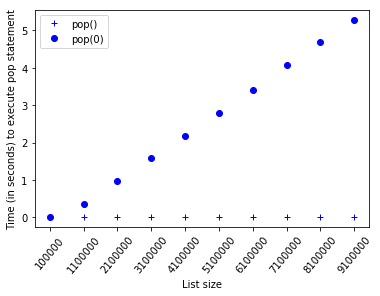

In [16]:
%matplotlib inline
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), ptList, 'b+', label='pop()')
# "bo" is for "blue dot"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), pzList, 'bo', label='pop(0)')
plt.ylabel('Time (in seconds) to execute pop statement')
plt.xlabel('List size')
plt.legend()
plt.xticks(range(listSizeStart,listSizeEnd,stepSize))
plt.xticks(rotation=50)
plt.show()

Some sources of error in our little experiment include the fact that there are other processes running on the computer as we measure that may slow down our code, so even though we try to minimize other things happening on the computer there is bound to be some variation in time. That is why the loop runs the test one thousand times in the first place to statistically gather enough information to make the measurement reliable.

### Dictionaries

The second major Python data structure is the dictionary. As you probably recall, dictionaries differ from lists in that you can access items in a dictionary by a key rather than a position. In future lectures we will see that there are many ways to implement a dictionary. The thing that is most important to notice right now is that the `get item` and `set item` operations on a dictionary are $O(1)$. Another important dictionary operation is the `contains` operation. Checking to see whether a key is in the dictionary or not is also $O(1)$. The efficiency of all dictionary operations is summarized below. One important side note on dictionary performance is that the efficiencies we provide in the table are for average performance. In some rare cases the `contains`, `get item`, and `set item` operations can degenerate into $O(n)$ performance but we will get into that in future lectures when we talk about the different ways that a dictionary could be implemented.

![](./images/do.png)

For our last performance experiment we will compare the performance of the contains operation between lists and dictionaries. In the process we will confirm that the contains operator for lists is $O(n)$ and the contains operator for dictionaries is $O(1)$. The experiment we will use to compare the two is simple. We’ll make a list with a range of numbers in it. Then we will pick numbers at random and check to see if the numbers are in the list. If our performance tables are correct, the bigger the list the longer it should take to determine if any one number is contained in the list.

We will repeat the same experiment for a dictionary that contains numbers as the keys. In this experiment we should see that determining whether or not a number is in the dictionary is not only much faster, but the time it takes to check should remain constant even as the dictionary grows larger.

The following code implements this comparison. Notice that we are performing exactly the same operation, `number in container`. The difference is that on line 11, `x` is a list, and on line 13, `x` is a dictionary.

In [17]:
import timeit
import random

print('{:>12} {:>12} {:>12}'.format('size','list','dictionary'))    
listSizeStart = 10000
listSizeEnd = 1000001
stepSize = 100000
for i in range(listSizeStart,listSizeEnd,stepSize):
    t = timeit.Timer("random.randrange(%d) in x"%i,"from __main__ import random,x")
    x = list(range(i)) #Create a list
    lst_time = t.timeit(number=1000)
    x = {j:None for j in range(i)} #Create a dictionary
    d_time = t.timeit(number=1000)
    print("%12d,%12.3f,%12.3f" % (i, lst_time, d_time))

        size         list   dictionary
       10000,       0.043,       0.001
      110000,       0.433,       0.001
      210000,       0.847,       0.001
      310000,       1.300,       0.001
      410000,       1.717,       0.001
      510000,       2.064,       0.001
      610000,       2.521,       0.001
      710000,       2.881,       0.001
      810000,       3.413,       0.001
      910000,       3.755,       0.001


The following plot summarizes the results of running the previous experiment. You can see that the dictionary is consistently faster. For the smallest list size of 10,000 elements, a dictionary is 89.4 times faster than a list. For the largest list size of 910,000 elements the dictionary is around 4,000 times faster! You can also see that the time it takes for the contains operator on the list grows linearly with the size of the list. This verifies the assertion that the contains operator on a list is $O(n)$. It can also be seen that the time for the contains operator on a dictionary is constant even as the dictionary size grows.

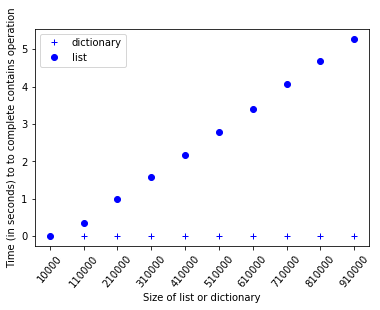

In [18]:
import matplotlib.pyplot as plt

# b+ is for "blue cross"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), ptList, 'b+', label='dictionary')
# "bo" is for "blue dot"
plt.plot(range(listSizeStart,listSizeEnd,stepSize), pzList, 'bo', label='list')
plt.ylabel('Time (in seconds) to to complete contains operation')
plt.xlabel('Size of list or dictionary')
plt.legend()
plt.xticks(range(listSizeStart,listSizeEnd,stepSize))
plt.xticks(rotation=50)
plt.show()

Since Python is an evolving language, there are always changes going on behind the scenes. The latest information on the performance of Python data structures can be found on the Python website. As of this writing the Python wiki has a nice time complexity page that can be found at the [Time Complexity Wiki](https://wiki.python.org/moin/TimeComplexity).

#### References

- [Problem Solving with Algorithms and Data Structures using Python by Bradley N. Miller, David L. Ranum is licensed under a Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.](https://runestone.academy/runestone/books/published/pythonds/AlgorithmAnalysis/toctree.html)